# Цель лабораторной работы
Изучить различные методы визуальзации данных
# Задание 

- Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
- Для первой лабораторной работы рекомендуется использовать датасет без пропусков в данных, например из Scikit-learn.
- Пример преобразования датасетов Scikit-learn в Pandas Dataframe можно посмотреть здесь.
- Для лабораторных работ не рекомендуется выбирать датасеты большого размера.

- Создать ноутбук, который содержит следующие разделы:
- Текстовое описание выбранного Вами набора данных.
- Основные характеристики датасета.
- Визуальное исследование датасета.
- Информация о корреляции признаков.
- Сформировать отчет и разместить его в своем репозитории на github.

# Ход выполнения работы
## 1) Текстовое описание набора данных

### В качестве набора данных используется набор по исследованию качества белых вин 

Датасет состоит из одного файла:
- wine.csv

Файл содержит следующие колонки:
1. fixed acidity  —  фиксированная кислотность 
2. volatile acidity  —   летучая кислотность 
3. citric acid  —  лимонная кислота 
4. residual sugar  —  остаточный сахар
5. chlorides  —  хлориды
6. free sulfur dioxide  —  свободный диоксид серы 
7. total sulfur dioxide  —  общая двуокись серы 
8. density  —  плотность 
9. pH  —  потенциал водорода 
10. sulphates  —  сульфаты 
11. alcohol  —  алкоголь 
12. quality  —  качество алкоголя (выходной параметр) 

### Импортируем библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузим данные датасета

In [4]:
data = pd.read_csv('wine.csv', sep=";")

### Проверим корректность загрузки

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Размер датасета

In [6]:
data.shape

(4898, 12)

### Список атрибутов

In [7]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Проверка датасета на наличие пустых значений

In [8]:
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

fixed acidity - 0
volatile acidity - 0
citric acid - 0
residual sugar - 0
chlorides - 0
free sulfur dioxide - 0
total sulfur dioxide - 0
density - 0
pH - 0
sulphates - 0
alcohol - 0
quality - 0


### Основные статистические характеристки набора данных

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Уникальные значения для целевого признака

In [10]:
data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

## 2) Визуальное исследование датасета 

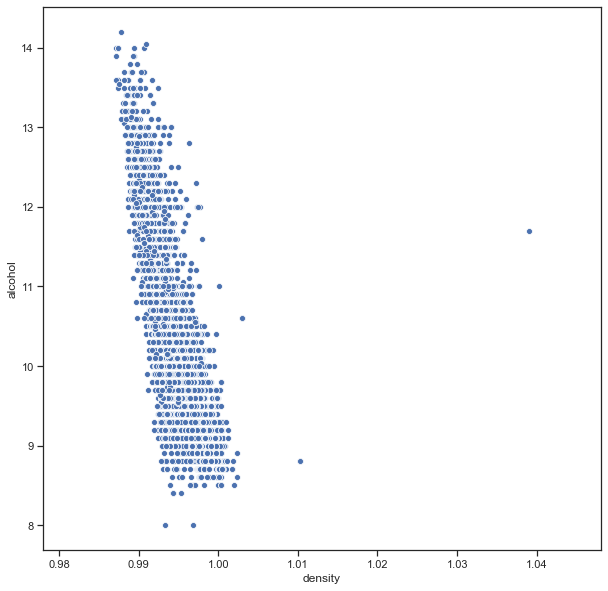

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='density', y='alcohol', data=data)

Можно заметить, что между атрибутами density и alcohol пристутствует что-то похожее на линейную зависимость

### Введем в зависимость целевой признак

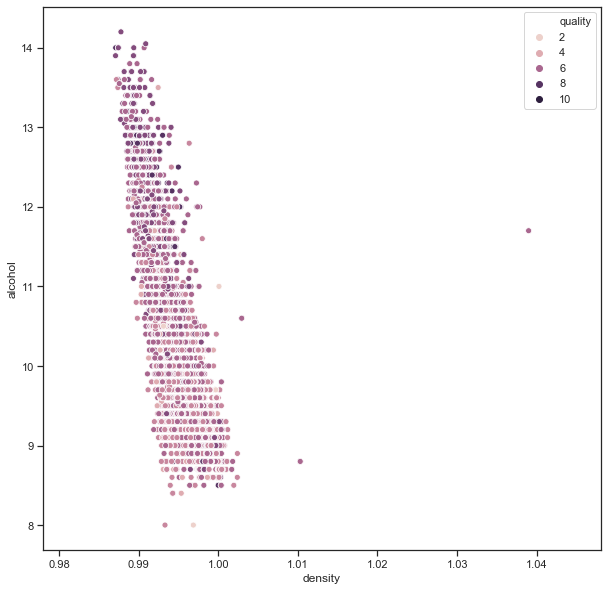

In [12]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.scatterplot(ax=ax, x='density', y='alcohol', data=data, hue='quality')

### Распределение качества алкоголя

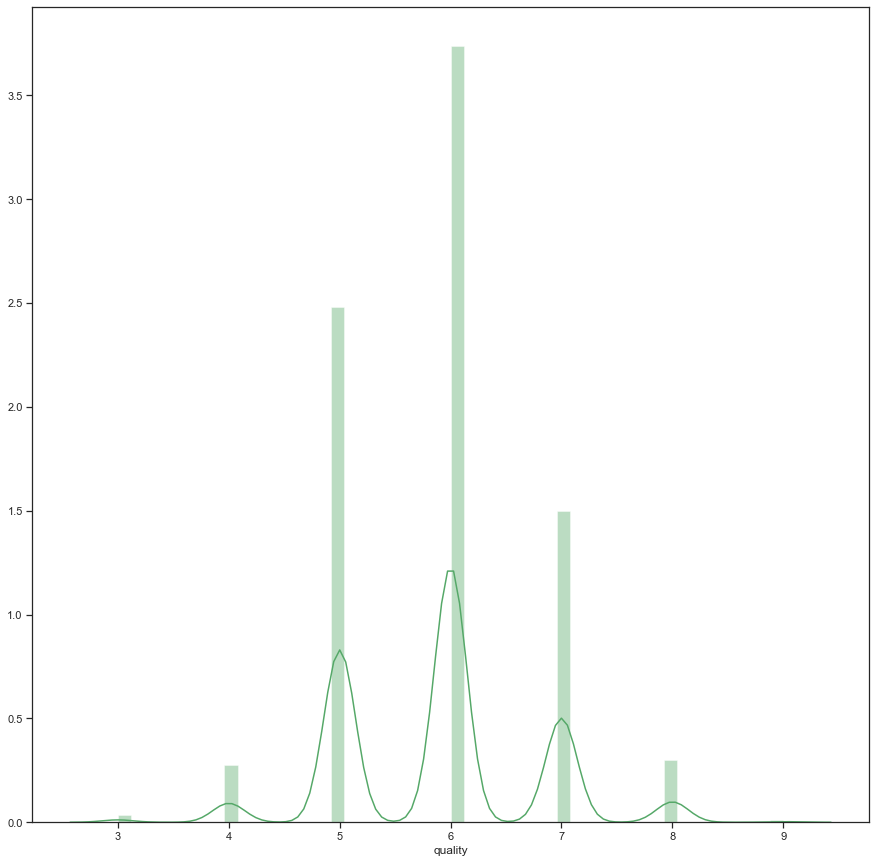

In [14]:
fig, ax = plt.subplots(figsize=(13,13))
sns.distplot(data['quality'], color="g")

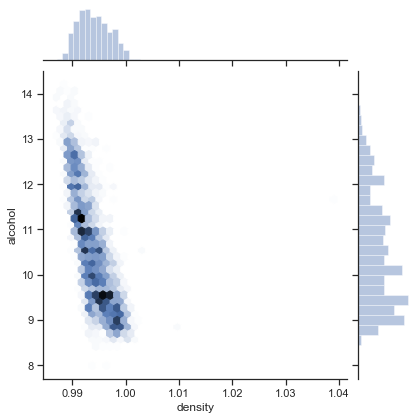

In [15]:
sns.jointplot(x='density', y='alcohol', data=data, kind="hex")

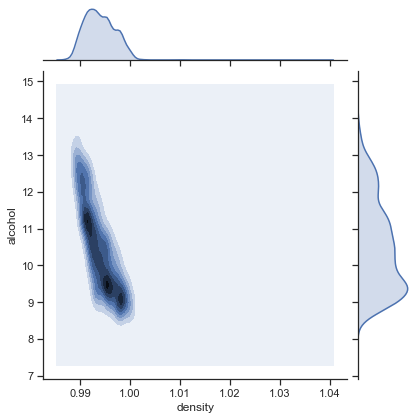

In [16]:
sns.jointplot(x='density', y='alcohol', data=data, kind="kde")

### Парные диаграммы

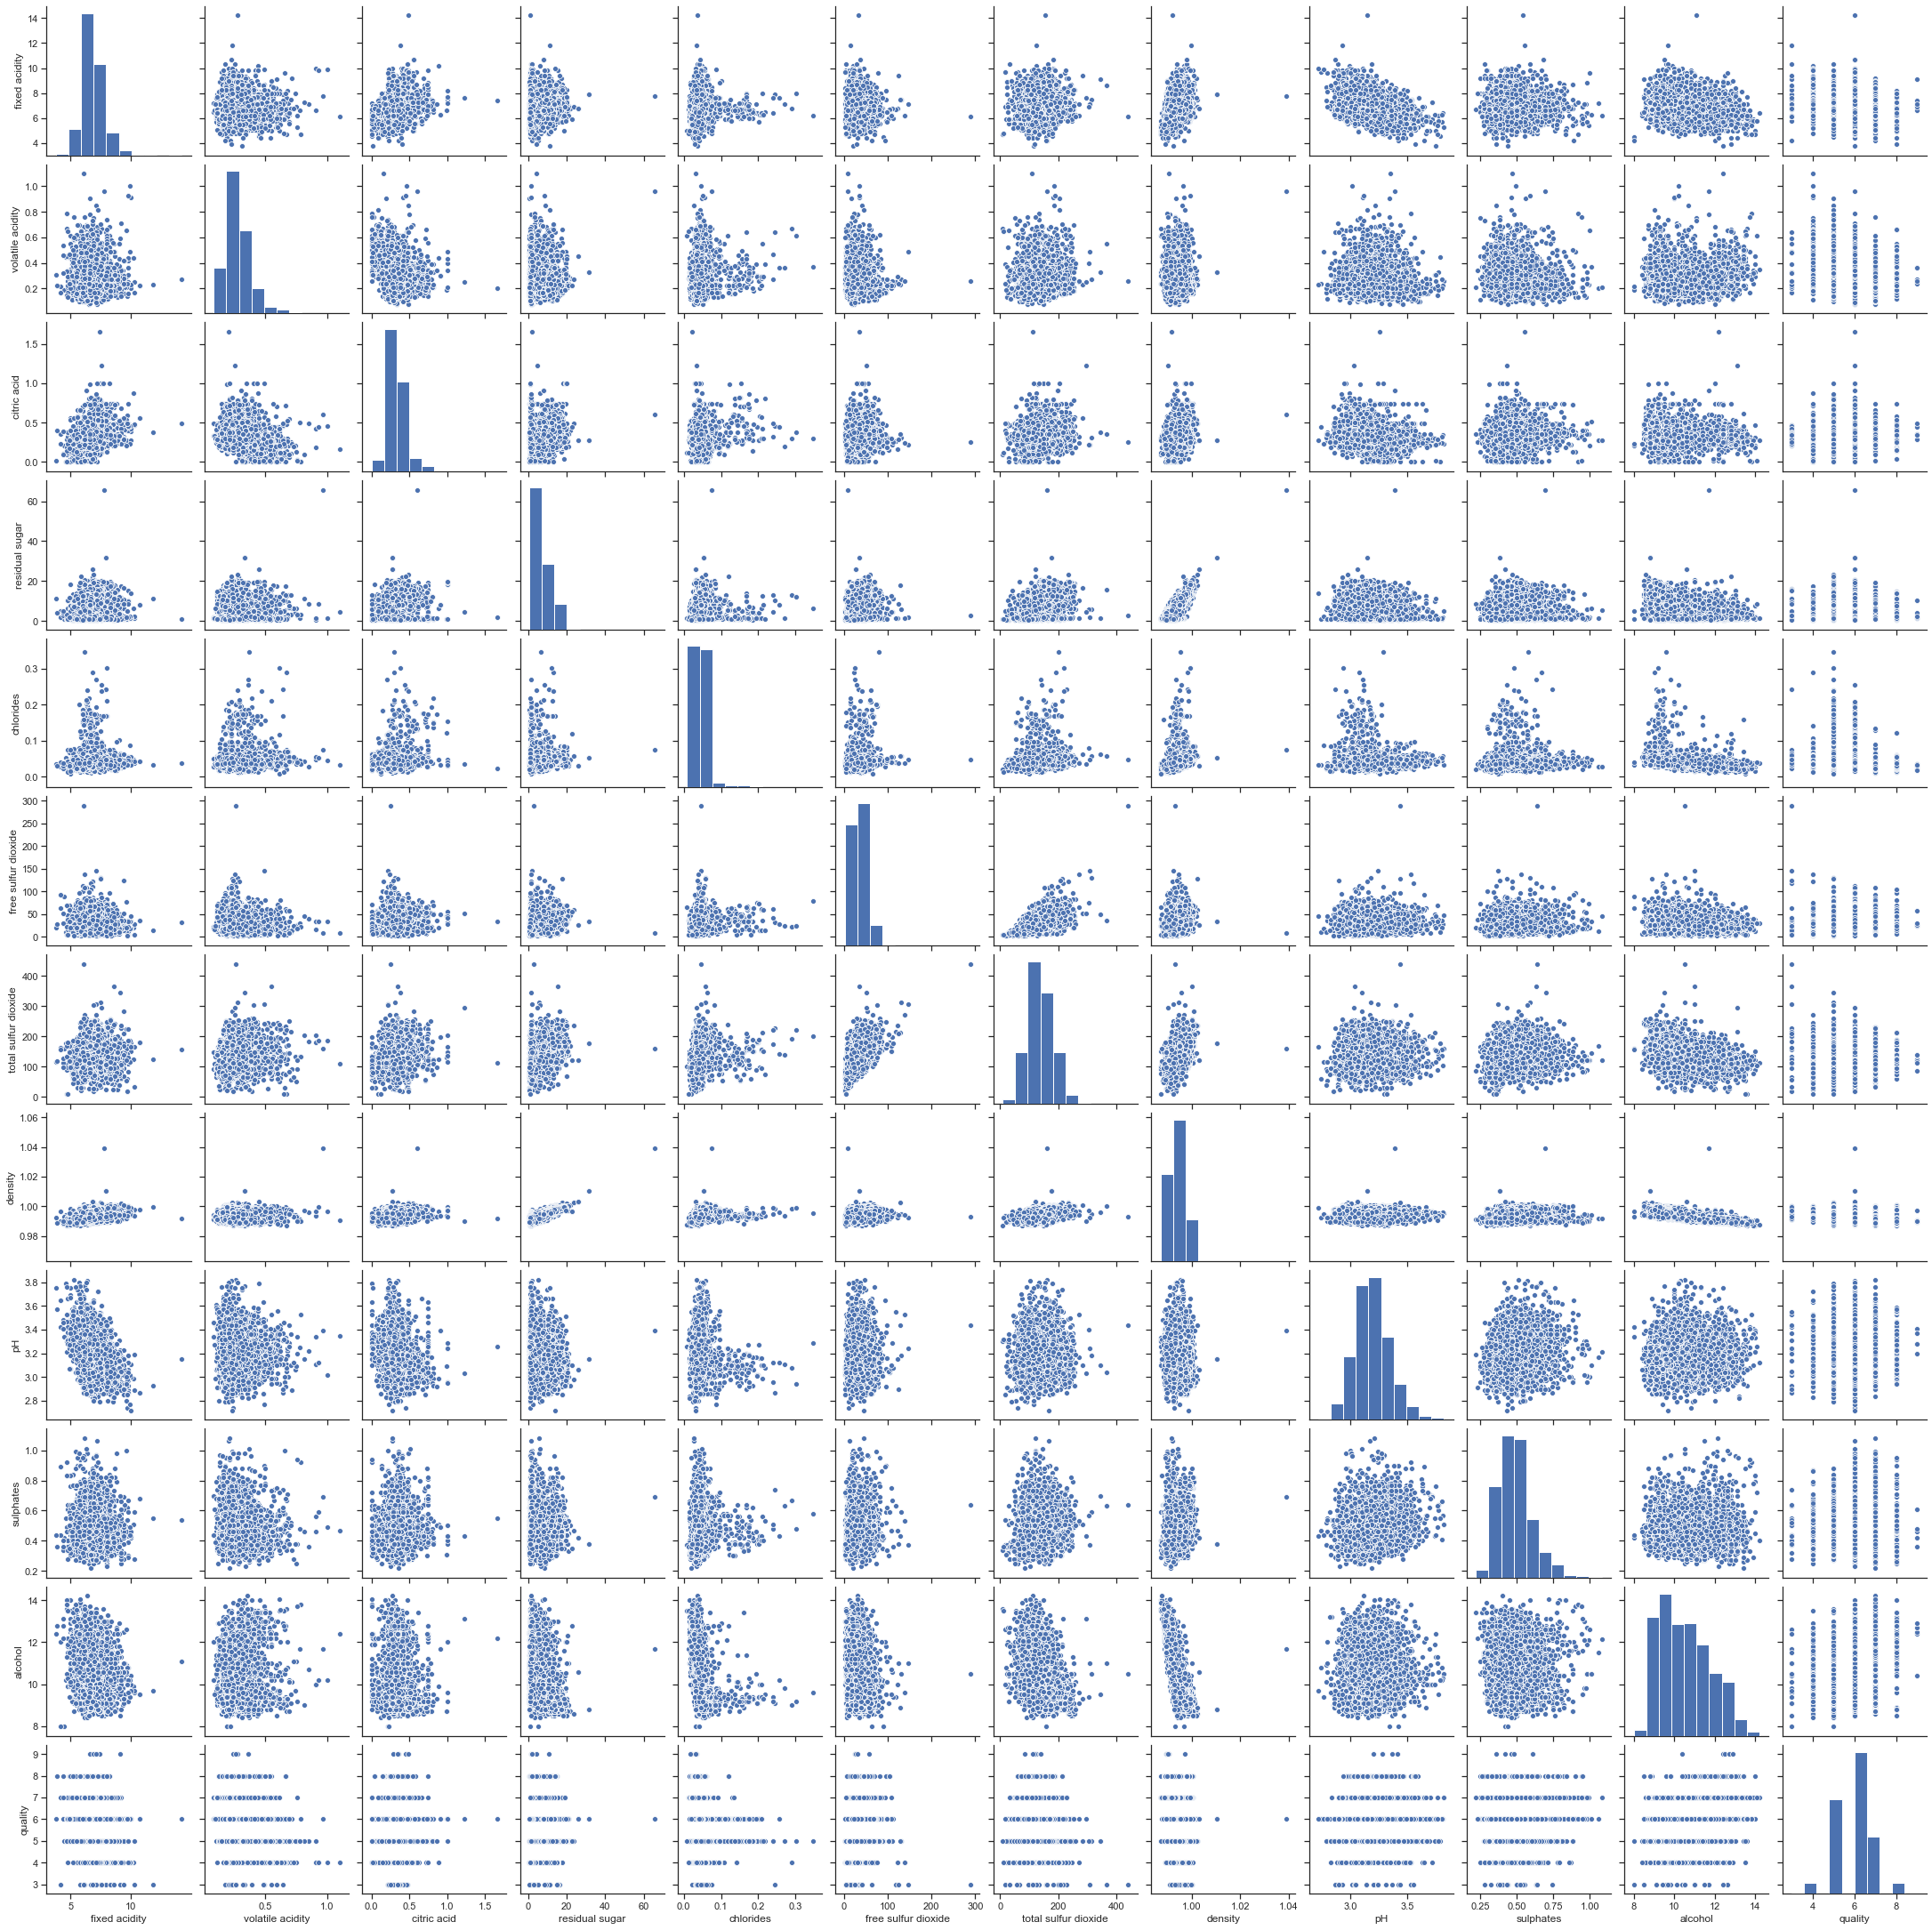

In [17]:
sns.pairplot(data)

### Группирование по значению целевого признака

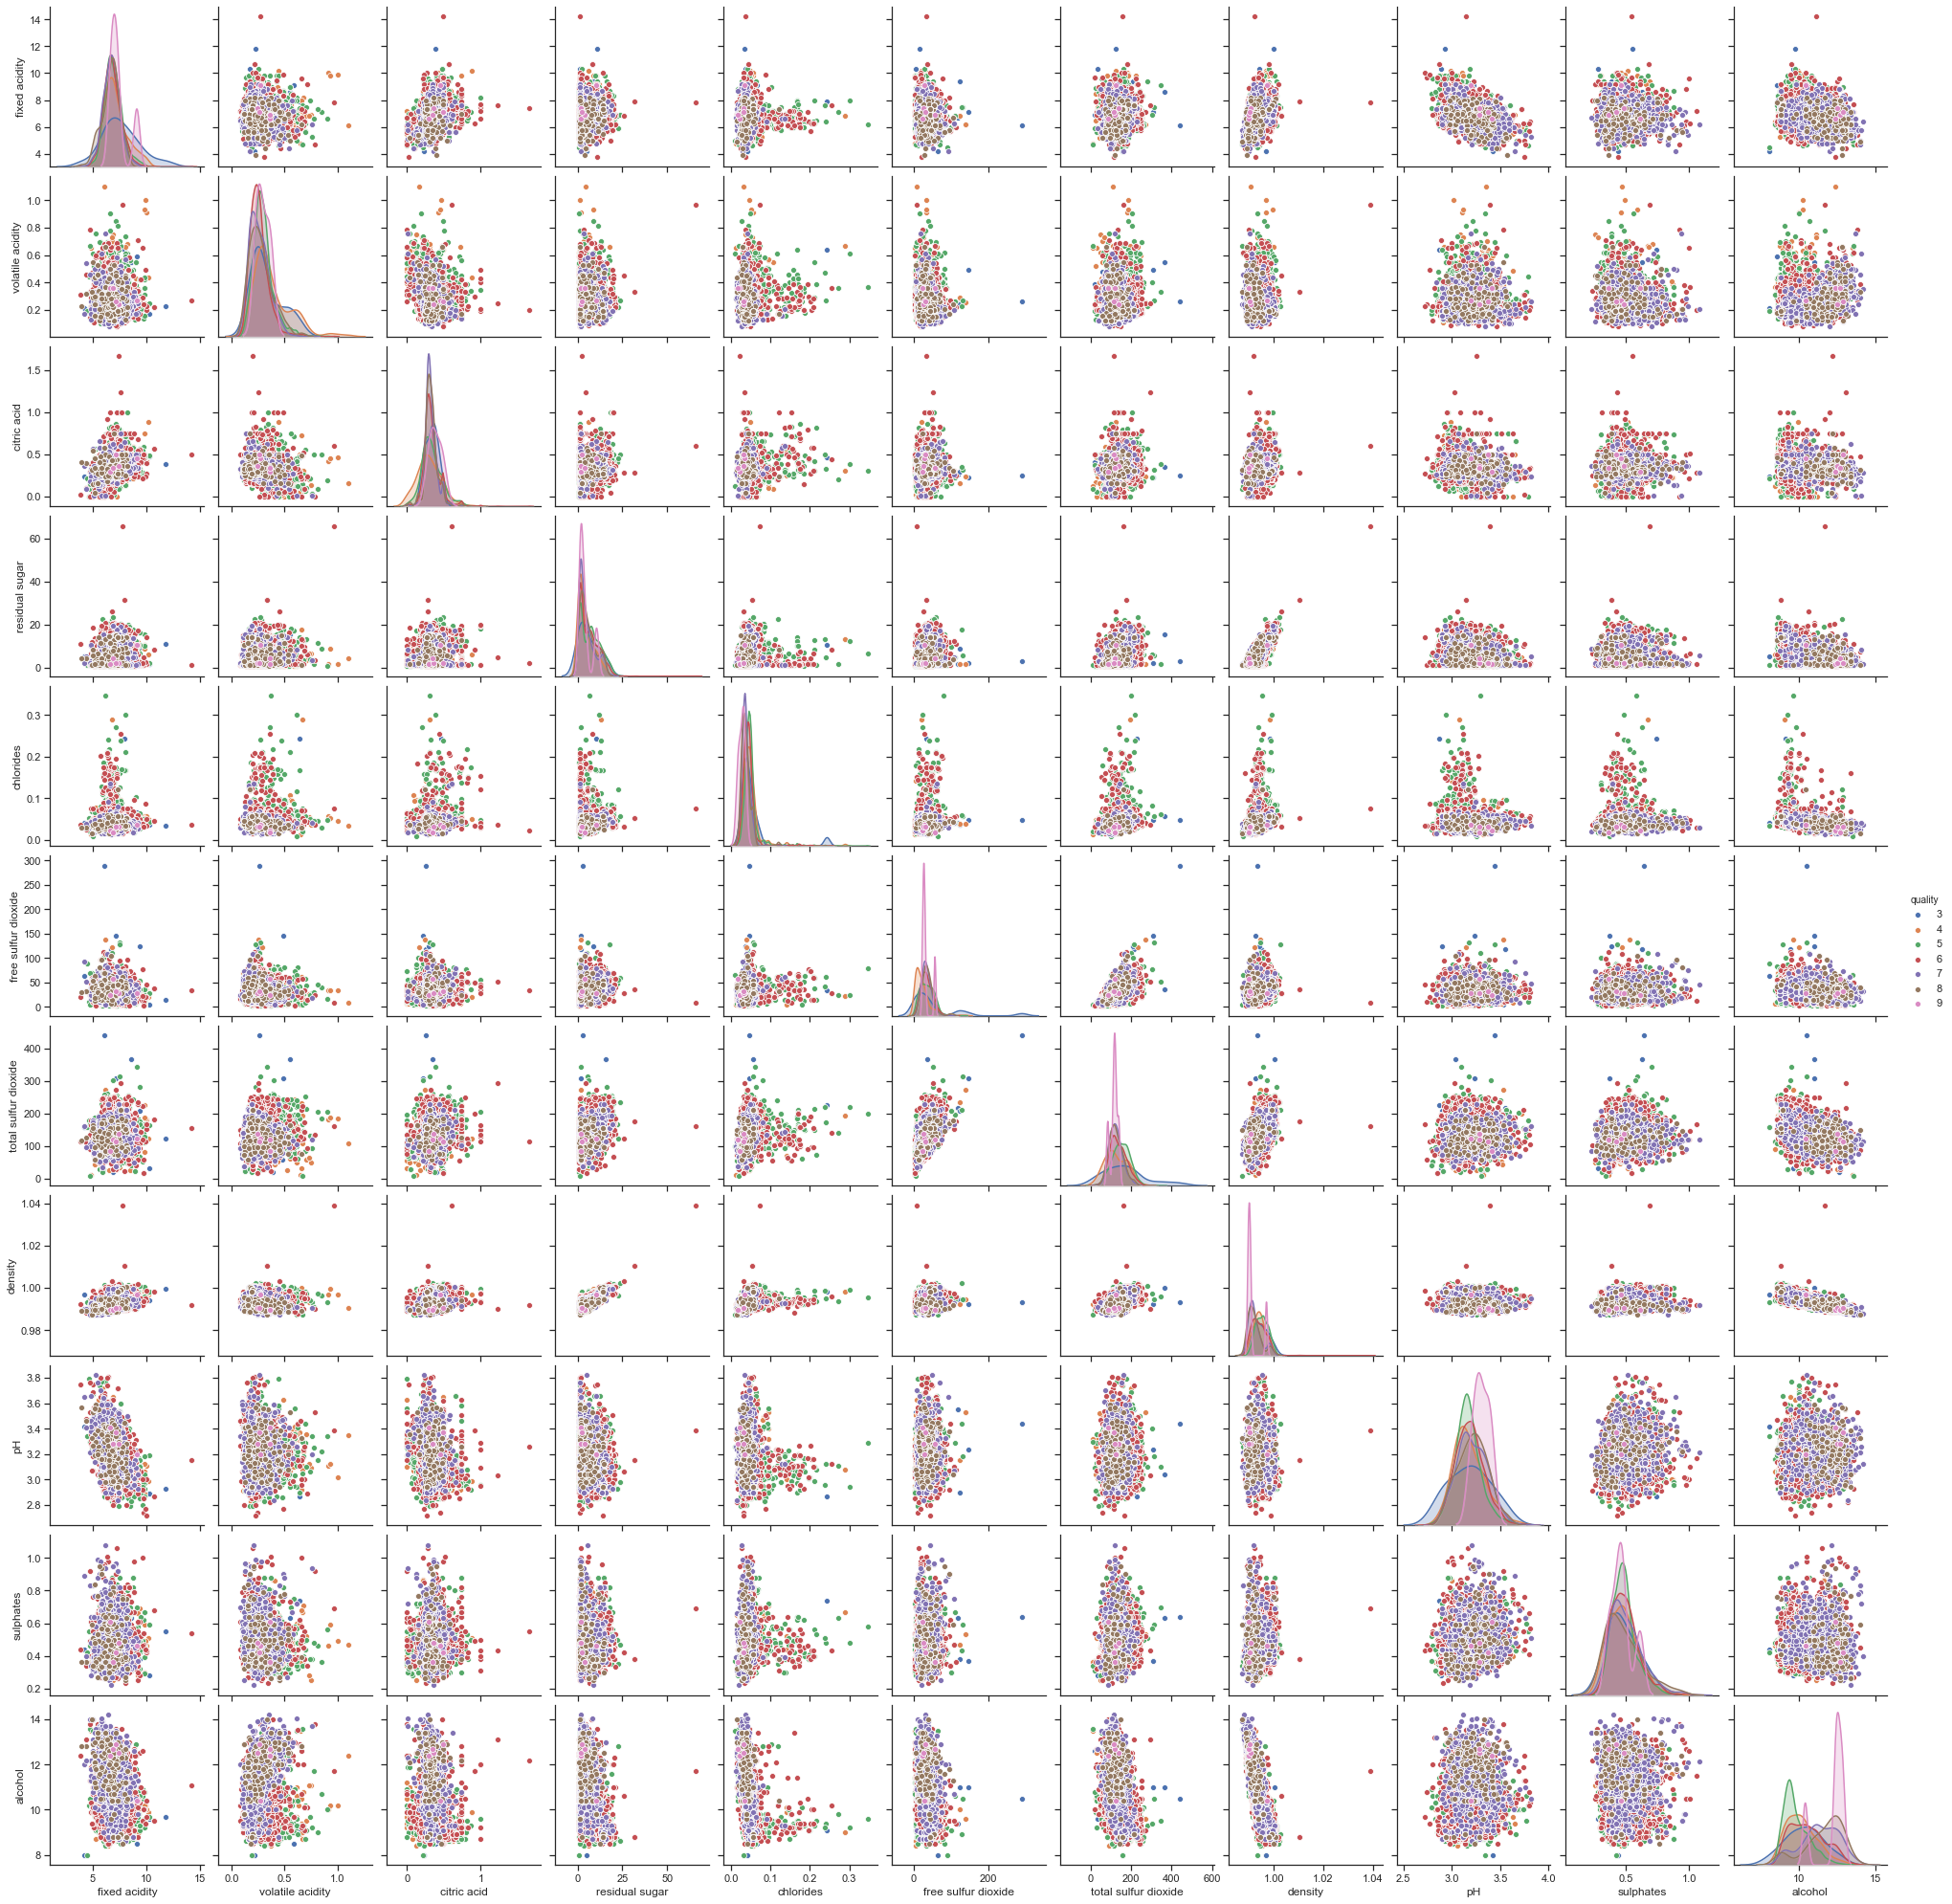

In [18]:
sns.pairplot(data, hue="quality")

## 3) Информация о корреляции признаков

In [24]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [25]:
data.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [26]:
data.corr(method='kendall')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.029565,0.208569,0.074946,0.065361,-0.016940,0.077272,0.185510,-0.294796,-0.008724,-0.073241,-0.065474
volatile acidity,-0.029565,1.000000,-0.104012,0.072757,-0.003523,-0.054751,0.081319,0.006600,-0.030385,-0.011580,0.023495,-0.154787
citric acid,0.208569,-0.104012,1.000000,0.015329,0.022292,0.060809,0.062188,0.061542,-0.101307,0.054489,-0.019981,0.014557
residual sugar,0.074946,0.072757,0.015329,1.000000,0.155274,0.236748,0.293319,0.588989,-0.125553,-0.002545,-0.305601,-0.063087
chlorides,0.065361,-0.003523,0.022292,0.155274,1.000000,0.113851,0.257075,0.349119,-0.037891,0.062555,-0.404039,-0.244856
free sulfur dioxide,-0.016940,-0.054751,0.060809,0.236748,0.113851,1.000000,0.444696,0.217295,-0.005229,0.035621,-0.182539,0.017164
total sulfur dioxide,0.077272,0.081319,0.062188,0.293319,0.257075,0.444696,1.000000,0.388378,-0.008421,0.108697,-0.325826,-0.151230
density,0.185510,0.006600,0.061542,0.588989,0.349119,0.217295,0.388378,1.000000,-0.075630,0.064202,-0.635104,-0.266598
pH,-0.294796,-0.030385,-0.101307,-0.125553,-0.037891,-0.005229,-0.008421,-0.075630,1.000000,0.095823,0.102631,0.084441
sulphates,-0.008724,-0.011580,0.054489,-0.002545,0.062555,0.035621,0.108697,0.064202,0.095823,1.000000,-0.026410,0.026403


In [27]:
data.corr(method='spearman')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.042865,0.297878,0.106725,0.094691,-0.024542,0.112649,0.270031,-0.418341,-0.013238,-0.106827,-0.084485
volatile acidity,-0.042865,1.000000,-0.150410,0.108627,-0.004934,-0.081213,0.117614,0.010124,-0.045204,-0.016902,0.033967,-0.196562
citric acid,0.297878,-0.150410,1.000000,0.024621,0.032659,0.088314,0.093219,0.091425,-0.146193,0.079766,-0.029170,0.018333
residual sugar,0.106725,0.108627,0.024621,1.000000,0.227844,0.346107,0.431252,0.780365,-0.180028,-0.003844,-0.445257,-0.082070
chlorides,0.094691,-0.004934,0.032659,0.227844,1.000000,0.167046,0.375244,0.508302,-0.054006,0.093931,-0.570806,-0.314488
free sulfur dioxide,-0.024542,-0.081213,0.088314,0.346107,0.167046,1.000000,0.618616,0.327822,-0.006274,0.052252,-0.272569,0.023713
total sulfur dioxide,0.112649,0.117614,0.093219,0.431252,0.375244,0.618616,1.000000,0.563824,-0.011829,0.157825,-0.476619,-0.196680
density,0.270031,0.010124,0.091425,0.780365,0.508302,0.327822,0.563824,1.000000,-0.110061,0.095079,-0.821855,-0.348351
pH,-0.418341,-0.045204,-0.146193,-0.180028,-0.054006,-0.006274,-0.011829,-0.110061,1.000000,0.140243,0.148857,0.109362
sulphates,-0.013238,-0.016902,0.079766,-0.003844,0.093931,0.052252,0.157825,0.095079,0.140243,1.000000,-0.044868,0.033319


### Корреляционная матрица

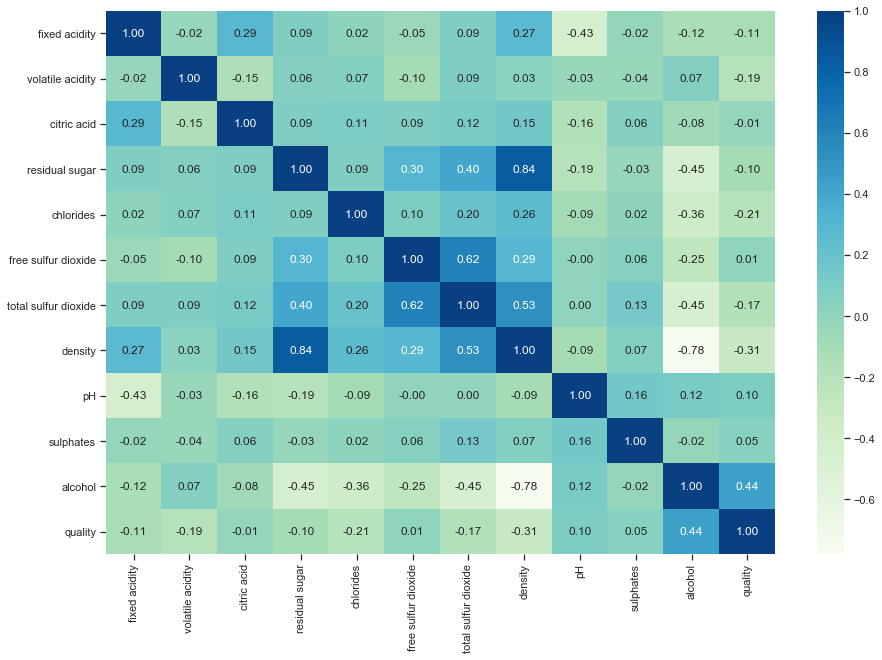

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='GnBu')

## Выводы о коррелирующих признаках

1. Коэффициенты корреляции в данном наборе  низкие.
2. Входные параметры влияют на качество алкоголя, так как они составляют его химический состав.
3. 'alcohol' и 'density' лучше всего коррелируют с целевым признаком, однако они очень сильно коррелируют друг с другом (|0.78|).
4. 'free sulfur' и 'total sulfur' довольно неплохо коррелируют друг с другом (|0.62|), что логично, так как общий дикосид серы является сумма связной и свободной серы. У них прослеживается явная заивисмость.

